In [1]:
import os
print(os.getcwd())

C:\Users\ACER\Desktop


In [2]:
import pandas as pd
df=pd.read_csv("country.csv")


In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
missing_values=df.isnull().sum()
statistical_summary=df.describe()
missing_values,statistical_summary

(country       0
 child_mort    0
 exports       0
 health        0
 imports       0
 income        0
 inflation     0
 life_expec    0
 total_fer     0
 gdpp          0
 dtype: int64,
        child_mort     exports      health     imports         income  \
 count  167.000000  167.000000  167.000000  167.000000     167.000000   
 mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
 std     40.328931   27.412010    2.746837   24.209589   19278.067698   
 min      2.600000    0.109000    1.810000    0.065900     609.000000   
 25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
 50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
 75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
 max    208.000000  200.000000   17.900000  174.000000  125000.000000   
 
         inflation  life_expec   total_fer           gdpp  
 count  167.000000  167.000000  167.000000     167.000000  
 mean     7.781832   70.555689    2.

In [9]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Feature Scaling

In [11]:
features=df.columns[1:]
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df[features])

In [50]:
features=df.columns[1:]
features

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'Cluster_KMEans', 'Cluster_KMeans',
       'Cluster_Hierarchical'],
      dtype='object')

PCA Fitting

In [12]:
pca=PCA()
pca_data=pca.fit_transform(scaled_data)

Variance explanation

In [14]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

Plotting the explained variance for each principal component

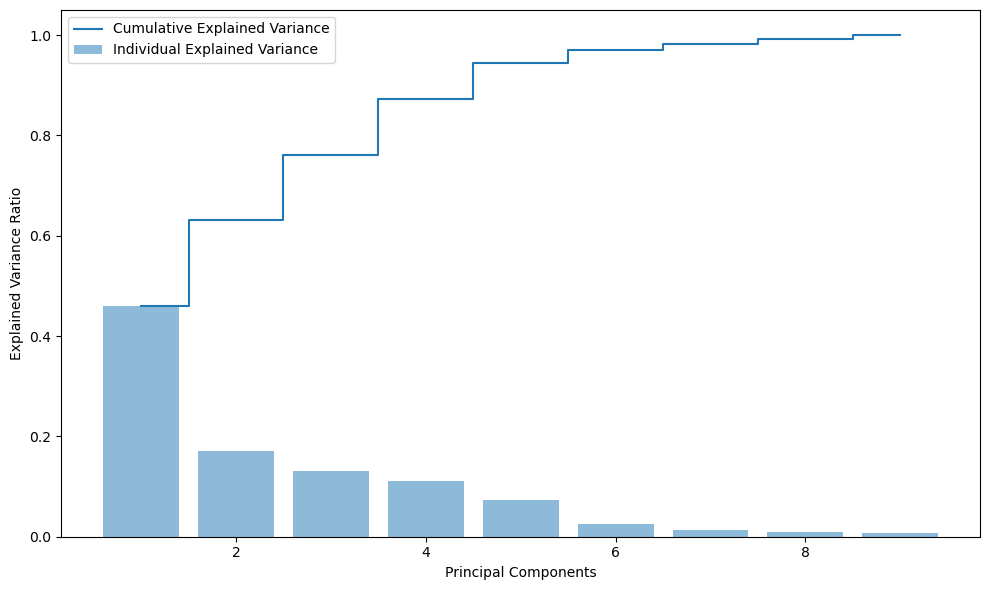

(array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
        0.02484235, 0.0126043 , 0.00981282, 0.00743056]),
 array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
        0.97015232, 0.98275663, 0.99256944, 1.        ]))

In [17]:
plt.figure(figsize=(10,6))
plt.bar(range(1,len(explained_variance)+1),explained_variance,alpha=0.5,align='center',label='Individual Explained Variance')
plt.step(range(1,len(explained_variance)+1),np.cumsum(explained_variance),where='mid',label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
explained_variance,np.cumsum(explained_variance)

Transform original data into the princippal component space

In [19]:
pca=PCA(n_components=4)
pca_data_transformed=pca.fit_transform(scaled_data)
df_pca=pd.DataFrame(data=pca_data_transformed,columns=['Principal Component 1',
                                                       'Principal Component 2',
                                                       'Principal component 3',
                                                       'Principal component 4'])
df_pca.head()
                    

,Principal Component 1,Principal Component 2,Principal component 3,Principal component 4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


In [20]:
df_pca.describe()

,Principal Component 1,Principal Component 2,Principal component 3,Principal component 4
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,7.445807e-17,-8.775416e-17,-1.994413e-17
std,2.039748e+00,1.247262e+00,1.085096e+00,1.000389e+00
min,-4.912066e+00,-2.997364e+00,-2.714085e+00,-1.595199e+00
25%,-1.382270e+00,-7.520480e-01,-5.218776e-01,-7.837847e-01
50%,2.240726e-02,-9.449868e-02,-2.456059e-01,-3.118565e-01
75%,1.224328e+00,5.534747e-01,4.025451e-01,7.107253e-01
max,6.917755e+00,6.682090e+00,6.110158e+00,3.129643e+00


KMeans

In [23]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

Plotting the results

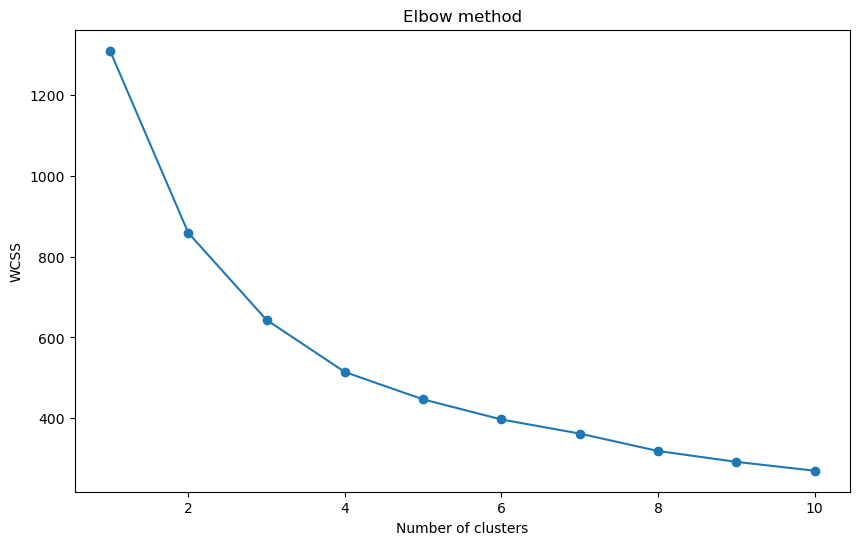

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
import os

# Set OMP_NUM_THREADS to 1 to mitigate the memory leak issue
os.environ['OMP_NUM_THREADS'] = '1'




KMeans fitting and cluster analysis

In [29]:
kmeans = KMeans(n_clusters=3,  random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(df_pca)
df['Cluster_KMeans'] = kmeans_clusters
df.head()

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_KMEans,Cluster_KMeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0


In [32]:
df.query("Cluster_KMeans == 0")

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_KMEans,Cluster_KMeans
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,0,0
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0,0
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,0


In [33]:
df.query("Cluster_KMeans == 1")

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_KMEans,Cluster_KMeans
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1,1


In [34]:
df.query("Cluster_KMeans == 2")

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_KMEans,Cluster_KMeans
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2,2
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2,2
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2,2
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2,2
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2,2
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,2,2
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,2,2
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,2,2
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,2,2


Visual representation using scatter plot

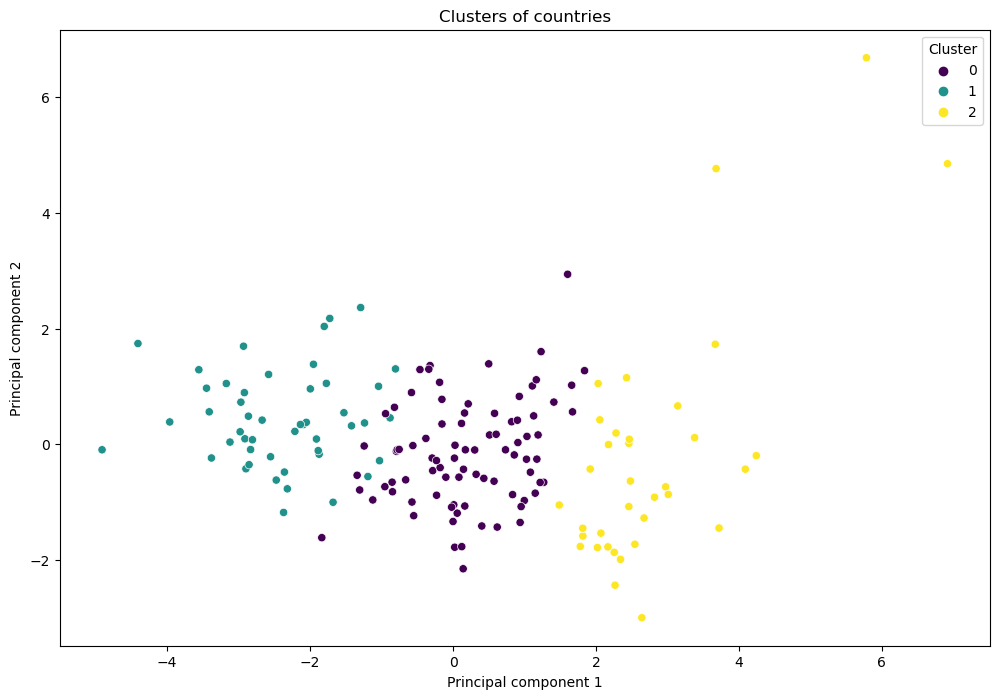

In [40]:
import seaborn as sns
df_pca['Cluster_KMeans'] = kmeans_clusters


plt.figure(figsize=(12, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster_KMeans', palette='viridis', data=df_pca)
plt.title('Clusters of countries')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(title='Cluster') 
plt.show()


Hieararchical Clustering

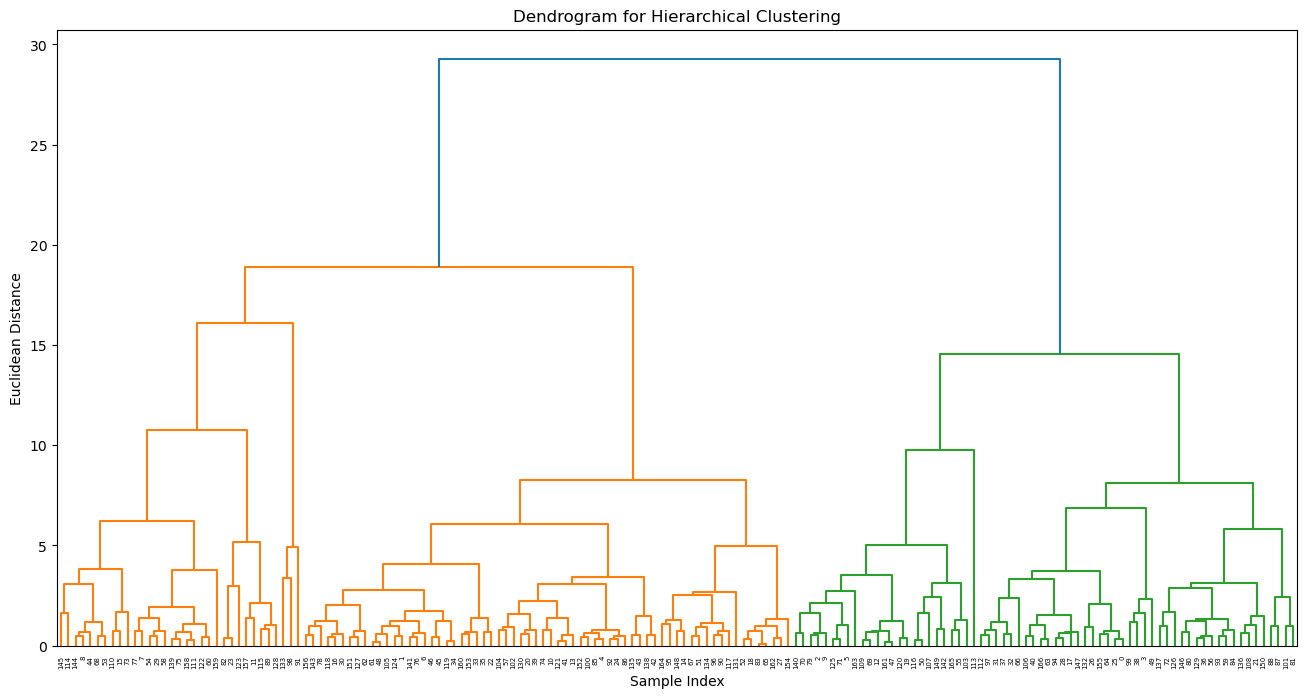

In [43]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(df_pca.drop('Cluster_KMeans',axis=1),method='ward')
plt.figure(figsize=(16,8))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()


In [45]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering=AgglomerativeClustering(n_clusters=3,linkage='ward',affinity='euclidean')
agg_clusters=agg_clustering.fit_predict(df_pca.drop('Cluster_KMeans',axis=1))
df['Cluster_Hierarchical']=agg_clusters

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [46]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_KMEans,Cluster_KMeans,Cluster_Hierarchical
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,0,2


In [48]:
cols_needed=df.select_dtypes(exclude='object').columns[:9]
df.groupby('Cluster_Hierarchical')[cols_needed].mean().T

Cluster_Hierarchical,0,1,2
child_mort,6.003030,74.598529,16.974242
exports,59.221212,28.876456,44.656061
health,8.527576,6.054706,6.743788
imports,49.387879,39.461263,53.295455
income,48133.333333,5582.250000,13563.181818
inflation,4.186576,13.080809,4.119909
life_expec,79.939394,62.492647,74.171212
total_fer,1.853939,4.284265,2.118182
gdpp,43551.515152,2588.058824,8361.000000
